# Case study with mixed images using the FICA implementation

In [1]:
#using Pkg
#Pkg.add("ImageView")
using Images, FileIO, Colors

## Loading the test images and converting them to a grayscale image
For this case study we used 2 cat pictures, they will be refered to as cat one and cat two by
order of appearance

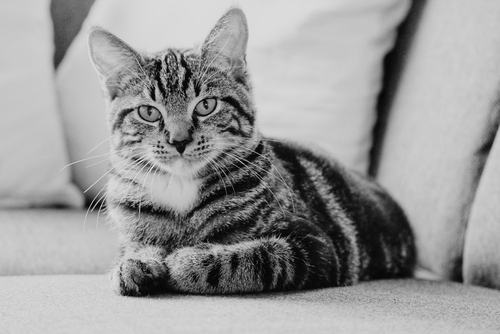

In [2]:
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)

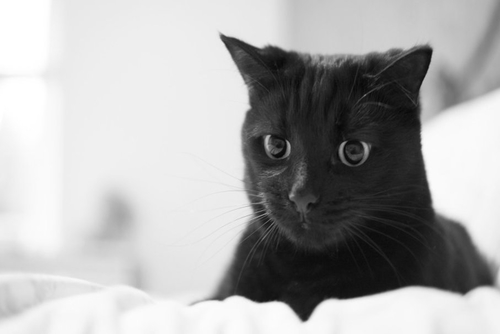

In [3]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

## Mixing the images together to create 2 mixed images
For each image we use a different factor ( array A )
the first mixed image has a stronger presence from cat two and the second image a stronger presence from cat one

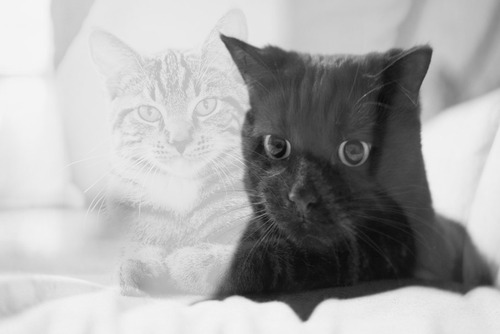

In [4]:
using LinearAlgebra
#convert image to array
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
A = [0.2 , 0.8] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
save("mix_image_one.jpg",imageX)
load("mix_image_one.jpg")

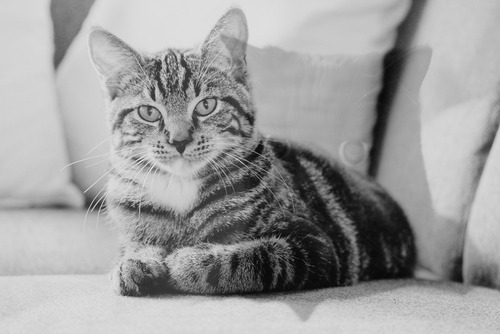

In [5]:
#generate second mixed signal
#factor used for the image
A = [0.8 , 0.2] 

Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]

imageZ = reshape(Z,rows,col)
save("mix_image_two.jpg",imageZ)
load("mix_image_two.jpg")


## Applying the FICA algorithm

In [30]:
include("fastICA.jl")
mixed_signal = hcat(X,Z);  
X1 = fastICA.whiten(mixed_signal)
X2 =  X1 * mixed_signal' 
J = fastICA.fast_ica(100,2,Array(X2'),0.000001,1.,true)


wp = [0.835952, 0.164048]
w1 = [-0.981284, -0.192568]
W for iter 1 = [0.835952 0.164048; 0.377426 0.634286]
Change for iter 1 = 0.14810359508933124
wp = [-0.981284, -0.192568]
w1 = [0.981284, 0.192568]
W for iter 2 = [0.835952 0.164048; 0.377426 0.634286]
Change for iter 2 = 1.1102230246251565e-16
wp = [-0.778824, 0.400897]
w1 = [0.576916, -0.816804]
W for iter 1 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 1 = 0.22322994181239042


wp = [0.576916, -0.816804]
w1 = [-0.745608, 0.666384]
W for iter 2 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 2 = 0.025541527630372318
wp = [-0.745608, 0.666384]
w1 = [0.691118, -0.722742]
W for iter 3 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 3 = 0.003072654029270261
wp = [0.691118, -0.722742]
w1 = [-0.712938, 0.701227]
W for iter 4 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 4 = 0.0004694963754464654
wp = [-0.712938, 0.701227]
w1 = [0.704873, -0.709333]
W for iter 5 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 5 = 6.538186553262104e-5
wp = [0.704873, -0.709333]
w1 = [-0.707947, 0.706266]
W for iter 6 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 6 = 9.42854117180758e-6
wp = [-0.707947, 0.706266]
w1 = [0.706789, -0.707425]
W for iter 7 = [0.835952 0.164048; 0.373057 0.626943]
Change for iter 7 = 1.3418008431020922e-6
wp = [0.706789, -0.707425]
w1 = [-0.707227, 0.706987]
W for iter 8 = [0.835952 0.164048; 0.373057 0.62694

2×2 Array{Float64,2}:
  0.981284  0.192568
 -0.707227  0.706987

## Results

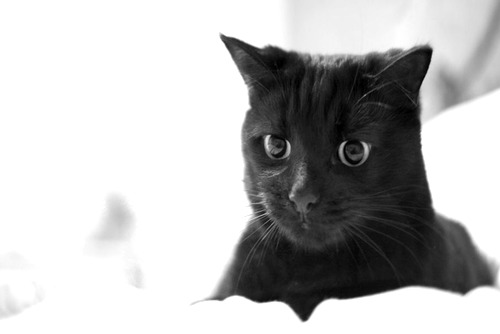

In [33]:
W = J * mixed_signal'
save("res_one.jpg",map(clamp01nan, reshape((W[1,:,]-W[2,:,]),rows,col)))
load("res_one.jpg")

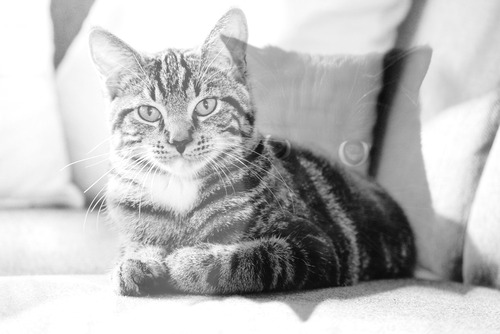

In [37]:
save("res_two.jpg",map(clamp01nan, reshape((W[1,:,]+W[2,:,]),rows,col)))
load("res_two.jpg")